In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# 데이터 경로 설정
data_path = "./dataset/train/digital_img"  # 여기에는 데이터셋의 경로를 입력하세요.

# 이미지 데이터 증강을 위한 ImageDataGenerator 생성
datagen = ImageDataGenerator(
    rescale=1./255,        # 이미지 값을 0과 1 사이로 조정
    shear_range=0.2,       # 전단변환을 적용
    zoom_range=0.2,        # 랜덤으로 이미지를 확대 또는 축소
    horizontal_flip=True,  # 랜덤으로 이미지를 수평으로 뒤집기
    validation_split=0.2   # validation 데이터의 비율 지정
)

# 데이터셋 로딩 및 전처리
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(800, 600),  # ResNet50의 기본 입력 크기에 맞춤 224, 224
    batch_size=32,
    class_mode='categorical',  # 다중 클래스 분류
    shuffle=True,
    subset='training'           # 학습 데이터의 비율 지정
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(800, 600),  # validation 데이터의 크기는 훈련과 동일하게 설정
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1068 images belonging to 8 classes.
Found 263 images belonging to 8 classes.


In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# ResNet50 모델 불러오기 (include_top=False로 변경)
base_model = ResNet50(weights='imagenet', include_top=False)

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(8, activation='softmax')(x)  # 클래스 수에 맞게 조정

# 새로운 모델 구성
model = Model(inputs=base_model.input, outputs=predictions)

# 미리 학습된 층은 동결 (Fine-tuning을 위한 기본 설정)
for layer in base_model.layers:
    layer.trainable = False
    
# 모델 컴파일
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#base_model.trainable = True
#for i in base_model.layers[:130]:
#    i.trainable = False
# Fine-tuning 진행
history = model.fit(
    train_generator,
    epochs=9,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
)

Epoch 1/9
34/34 [==============================] - 200s 6s/step - loss: 2.4869 - accuracy: 0.2313 - val_loss: 1.7108 - val_accuracy: 0.2510
Epoch 2/9
34/34 [==============================] - 203s 6s/step - loss: 1.6285 - accuracy: 0.4335 - val_loss: 1.4236 - val_accuracy: 0.4677
Epoch 3/9
34/34 [==============================] - 208s 6s/step - loss: 1.2701 - accuracy: 0.6002 - val_loss: 1.0550 - val_accuracy: 0.7757
Epoch 4/9
34/34 [==============================] - 204s 6s/step - loss: 0.9565 - accuracy: 0.7509 - val_loss: 0.8876 - val_accuracy: 0.8251
Epoch 5/9
34/34 [==============================] - 209s 6s/step - loss: 0.7262 - accuracy: 0.8820 - val_loss: 0.5994 - val_accuracy: 0.9658
Epoch 6/9
34/34 [==============================] - 228s 7s/step - loss: 0.6211 - accuracy: 0.8530 - val_loss: 0.5336 - val_accuracy: 0.8327
Epoch 7/9
34/34 [==============================] - 218s 6s/step - loss: 0.4787 - accuracy: 0.9167 - val_loss: 0.4271 - val_accuracy: 0.8935
Epoch 8/9
34/34 [===

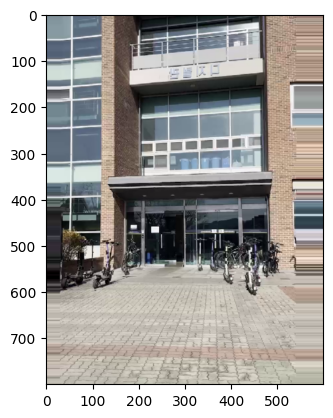

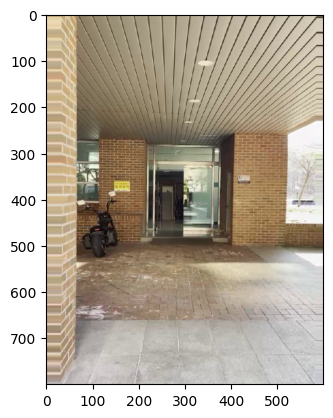

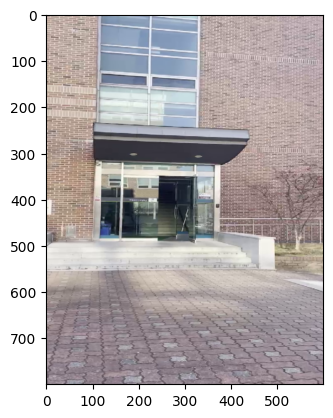

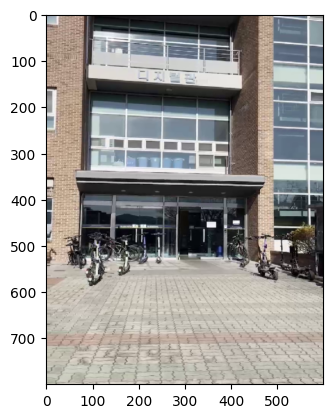

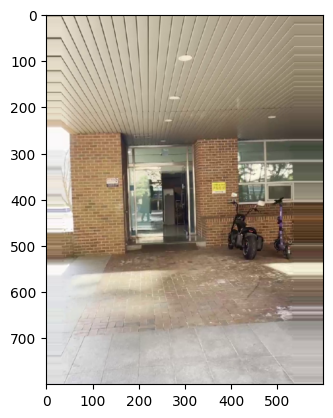

In [2]:
import matplotlib.pyplot as plt

for i in range(5):  # 처음 5장의 이미지만 확인
    image, _ = train_generator.next()
    plt.imshow(image[0])
    plt.show()

In [12]:
num_classes = len(train_generator.class_indices)
print("클래스의 수:", num_classes)

# 각 클래스별 이미지 수 확인
class_counts = {class_name: len(os.listdir(os.path.join(data_path, class_name))) for class_name in os.listdir(data_path)}
print("각 클래스별 이미지 수:", class_counts)

# 전체 이미지 수 확인
total_images = sum(class_counts.values())
print("전체 이미지 수:", total_images)

클래스의 수: 8
각 클래스별 이미지 수: {'d1_1': 163, 'd1_2': 167, 'd1_3': 165, 'db_1': 171, 'db_2': 164, 'db_3': 165, 'etc': 168, 'foun': 168}
전체 이미지 수: 1331


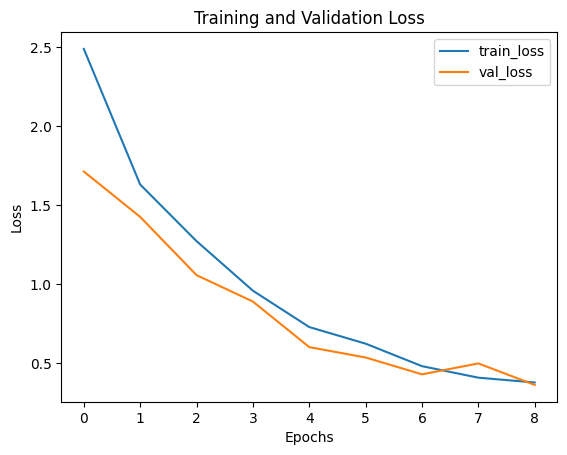

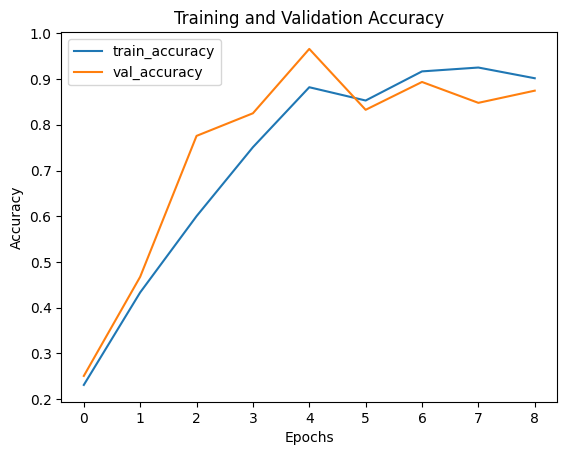

In [13]:
import matplotlib.pyplot as plt

# 손실 그래프
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
import os

path = "dataset/train/digital_img"

class_name = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))]

images = "./pred"

image_name = [f for f in os.listdir(images)]
image_name

['d1_1', 'd1_2', 'd1_3', 'db_1', 'db_2', 'db_3', 'etc', 'foun']

In [15]:
images = "./pred"

dir_name = [f for f in os.listdir(images)]
dir_name

['d1_1', 'd1_2', 'd1_3', 'db_1', 'db_2', 'db_3', 'etc', 'foun']

In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image

l = 0
c = 0

for i in dir_name:
    for j in [image for image in os.listdir(f"./pred/{i}")]:
        image_path = f"./pred/{i}/{j}"  # 예측하고자 하는 이미지의 경로를 입력하세요.
        img = image.load_img(image_path, target_size=(400, 400))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # 이미지를 [0, 1] 범위로 정규화
        # 모델에 입력 이미지 전달하여 예측 수행
        predictions = loaded_model.predict(img_array)

        # 예측 결과 출력
        predicted_class = np.argmax(predictions)

        predicted_label = class_name[predicted_class]

        print(np.max(predictions))
        print(i , predicted_label)
        if predicted_label == i:
            c += 1
        #if i.find(predicted_label) != -1:
            #c += 1
        l += 1
print(f"{(c / l)*100}%")

1/1 [==============================] - 1s 954ms/step
0.6017908
d1_1 d1_3
1/1 [==============================] - 0s 170ms/step
0.47844562
d1_1 d1_3
1/1 [==============================] - 0s 176ms/step
0.7299949
d1_2 d1_2
1/1 [==============================] - 0s 160ms/step
0.6405336
d1_2 d1_3
1/1 [==============================] - 0s 169ms/step
0.6465608
d1_3 d1_3
1/1 [==============================] - 0s 150ms/step
0.60536104
d1_3 d1_3
1/1 [==============================] - 0s 159ms/step
0.83437496
d1_3 d1_3
1/1 [==============================] - 0s 155ms/step
0.8416103
d1_3 d1_3
1/1 [==============================] - 0s 148ms/step
0.99931943
db_1 db_1
1/1 [==============================] - 0s 153ms/step
0.6066056
db_1 db_1
1/1 [==============================] - 0s 147ms/step
0.2613505
db_2 d1_2
1/1 [==============================] - 0s 155ms/step
0.43709207
db_2 db_3
1/1 [==============================] - 0s 151ms/step
0.42630386
db_2 d1_2
1/1 [==============================] - 0s 149

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

l = len(image_name)
c = 0

for i in image_name:
# 예측할 이미지 로드 및 전처리
    image_path = f"./pred/{i}"  # 예측하고자 하는 이미지의 경로를 입력하세요.
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # 이미지를 [0, 1] 범위로 정규화
    # 모델에 입력 이미지 전달하여 예측 수행
    predictions = model.predict(img_array)

    # 예측 결과 출력
    predicted_class = np.argmax(predictions)

    predicted_label = class_name[predicted_class]

    print(np.max(predictions))
    print(i , predicted_label)
    if i.find(predicted_label) != -1:
        c += 1
print(f"{(c / l)*100}%")

PermissionError: [Errno 13] Permission denied: './pred/d1_1'

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# 예측할 이미지 로드 및 전처리
image_path = "./dataset/train/digital_img/etc/etc_76.png"  # 예측하고자 하는 이미지의 경로를 입력하세요.
img = image.load_img(image_path, target_size=(224, 224))
img.show()
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # 이미지를 [0, 1] 범위로 정규화
# 모델에 입력 이미지 전달하여 예측 수행
predictions = model.predict(img_array)

# 예측 결과 출력
predicted_class = np.argmax(predictions)

class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

print(np.max(predictions))
print("Predicted label:", predicted_label)

1/1 [==============================] - 1s 843ms/step
0.39352533
Predicted label: etc


In [31]:
model.save("kumoh1.h5")

C:\Users\kmh\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
from tensorflow.keras.models import load_model

# 저장된 모델 불러오기
loaded_model = load_model("kumoh1.h5")